In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

#Make 1000 samples

n_samples = 1000

#Create circles

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state= 42)

In [4]:
len(X),len(y)

(1000, 1000)

In [5]:
print(f"first Five samples of X:\n{X[:5]}")
print(f"first Five samples of X:\n{y[:5]}")

first Five samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first Five samples of X:
[1 1 1 1 0]


In [6]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [7]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


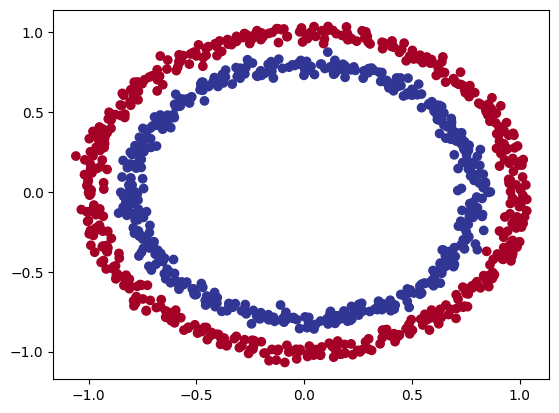

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

## This is a toy dataset from sklearn

```
# This is formatted as code
```



#### Check input and output shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

Traain Test Split

In [11]:
import torch
torch.__version__

'2.2.1+cu121'

In [12]:
type(X)

numpy.ndarray

In [13]:
# Turn Data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [15]:
torch.manual_seed(42)

In [16]:
##Split data into trian and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

In [17]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [18]:
n_samples

1000

In [19]:
## 2. Building a model
## Lets Build a model to classify our red and blue dots

In [20]:
import torch
from torch import nn

device = "cpu" if torch.cuda.is_available else "cpu"
device

'cpu'

In [21]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [22]:
## Now we have setup devicce agnostic code, let me create a model that:

In [23]:
X_train.shape,X_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [24]:
y_train.shape,y_test.shape

(torch.Size([800]), torch.Size([200]))

In [25]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    ## Create 2 NN.Linear Layers capable of handinling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,out_features=5) ## Take in 2 features and upscales to 5 featurres
    self.layer_2 = nn.Linear(in_features=5,out_features=1)

  def forward(self,x):
    return self.layer_2(self.layer_1(x))  # X(input) -> layer_1 -> layer_2 -> output

model_0 = CircleModelV0()  # Create an instance of CircleModelV0
model_0 = model_0.to(device)  # Move the instance to the specified device

model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
device

'cpu'

In [27]:
## Lets Replicate the model above using nn.sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features= 5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [28]:
# Make Predictions
with torch.inference_mode():
  untrained_preds  = model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_preds)},Shape:{untrained_preds.shape}")
print(f"Lenght of test samples:{len(X_test)},Shape:{X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\n First 10 Labels:\n{y_test[:10]}")

Length of predictions:200,Shape:torch.Size([200, 1])
Lenght of test samples:200,Shape:torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])

 First 10 Labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [29]:
loss_fn = nn.BCEWithLogitsLoss()  ## BCE With Logits Loss = Sigmoid Activation funtion built in

In [30]:
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [31]:
## Calculate accuracy - out of 100 exampples,what percentage does our model get right

def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [32]:
## 3.1 Going from raw Logits -> predictions probabilities -> prediction labels

In [33]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [34]:
# View the first 5 output of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [35]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [36]:
## Use the sigmoid activation funtion on our model logits into prediction probabilites
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [37]:
y_preds = torch.round(y_pred_probs)

In [38]:
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

In [51]:
epochs = 1000
X_train,y_train = X_train.to(device),y_train.to(device)
X_Text,y_test = X_test.to(device),y_test.to(device)

#Build training and eval loop

for epoch in range (epochs):
  model_0.train()
  #Training
  #Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  ## calculate loss and accuracy

  loss = loss_fn(y_logits,
              y_train)
  acc = accuracy_fn(y_true = y_train,
                y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()


  optimizer.step()


  ##testing

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                      y_test)
    test_acc = accuracy_fn(y_true = y_test,
                          y_pred = test_pred)

  if epoch % 10 ==0:
    print(f"Epoch:{epoch} # Loss:{loss:.5f} # accracy{acc:.2f}")
  # ``print(f"TestEpoch:{epoch} # TestLoss:{test_loss:.5f} # Testaccracy{test_acc:.2f}")

Epoch:0 # Loss:0.69304 # accracy51.12
Epoch:10 # Loss:0.69303 # accracy50.88
Epoch:20 # Loss:0.69303 # accracy51.12
Epoch:30 # Loss:0.69303 # accracy51.25
Epoch:40 # Loss:0.69302 # accracy51.00
Epoch:50 # Loss:0.69302 # accracy51.00
Epoch:60 # Loss:0.69302 # accracy50.75
Epoch:70 # Loss:0.69301 # accracy50.75
Epoch:80 # Loss:0.69301 # accracy51.38
Epoch:90 # Loss:0.69301 # accracy51.25
Epoch:100 # Loss:0.69301 # accracy51.25
Epoch:110 # Loss:0.69301 # accracy51.50
Epoch:120 # Loss:0.69300 # accracy51.62
Epoch:130 # Loss:0.69300 # accracy51.25
Epoch:140 # Loss:0.69300 # accracy51.25
Epoch:150 # Loss:0.69300 # accracy50.88
Epoch:160 # Loss:0.69300 # accracy51.00
Epoch:170 # Loss:0.69300 # accracy51.00
Epoch:180 # Loss:0.69300 # accracy51.00
Epoch:190 # Loss:0.69299 # accracy51.12
Epoch:200 # Loss:0.69299 # accracy50.88
Epoch:210 # Loss:0.69299 # accracy51.00
Epoch:220 # Loss:0.69299 # accracy51.12
Epoch:230 # Loss:0.69299 # accracy51.25
Epoch:240 # Loss:0.69299 # accracy51.12
Epoch:250 #

From the metrics it looks like our model is random guessing.

How could we investigate this further?

I've got an idea.

The data explorer's motto!

"Visualize, visualize, visualize!"

Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.

To do so, we'll write some code to download and import the helper_functions.py script from the Learn PyTorch for Deep Learning repo.

It contains a helpful function called plot_decision_boundary() which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

We'll also import plot_predictions() which we wrote in notebook 01 to use later.

In [52]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


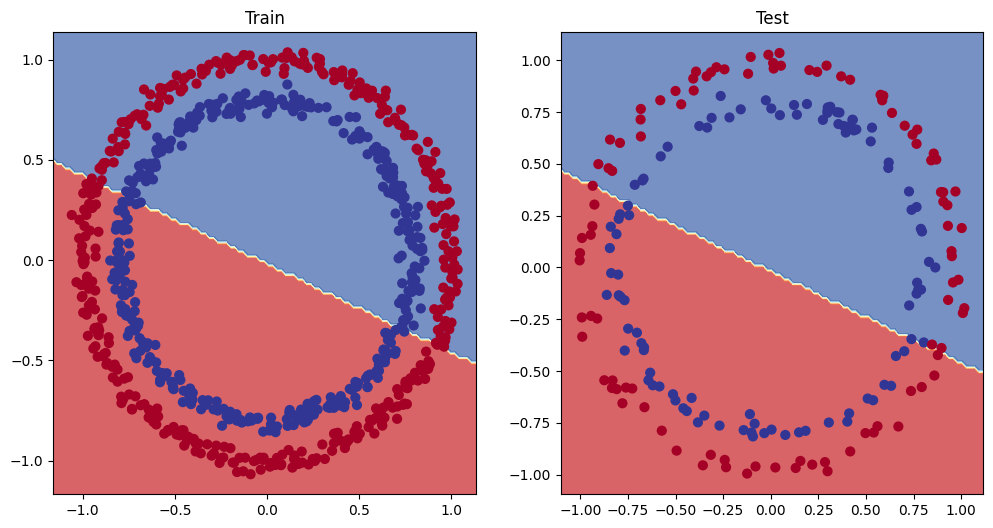

In [53]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [54]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [55]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [56]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69738, Accuracy: 50.00% | Test Loss: 0.69739, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69282, Accuracy: 49.12% | Test Loss: 0.69309, Test Accuracy: 45.50%
Epoch: 200 | Loss: 0.69190, Accuracy: 53.37% | Test Loss: 0.69220, Test Accuracy: 51.50%
Epoch: 300 | Loss: 0.69075, Accuracy: 57.00% | Test Loss: 0.69113, Test Accuracy: 57.00%
Epoch: 400 | Loss: 0.68941, Accuracy: 59.13% | Test Loss: 0.68984, Test Accuracy: 57.50%
Epoch: 500 | Loss: 0.68742, Accuracy: 62.38% | Test Loss: 0.68799, Test Accuracy: 60.50%
Epoch: 600 | Loss: 0.68439, Accuracy: 68.88% | Test Loss: 0.68536, Test Accuracy: 69.50%
Epoch: 700 | Loss: 0.67962, Accuracy: 76.25% | Test Loss: 0.68126, Test Accuracy: 74.50%
Epoch: 800 | Loss: 0.67160, Accuracy: 82.62% | Test Loss: 0.67437, Test Accuracy: 82.00%
Epoch: 900 | Loss: 0.65819, Accuracy: 86.25% | Test Loss: 0.66260, Test Accuracy: 83.50%


In [57]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

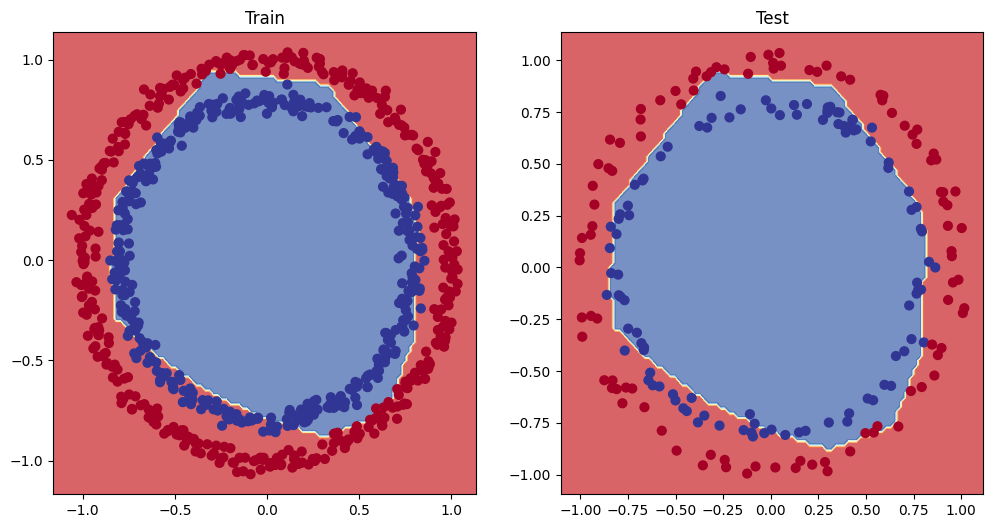

In [59]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity